In [1]:
import autorootcwd  # Do not delete - adds the root of the project to the path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

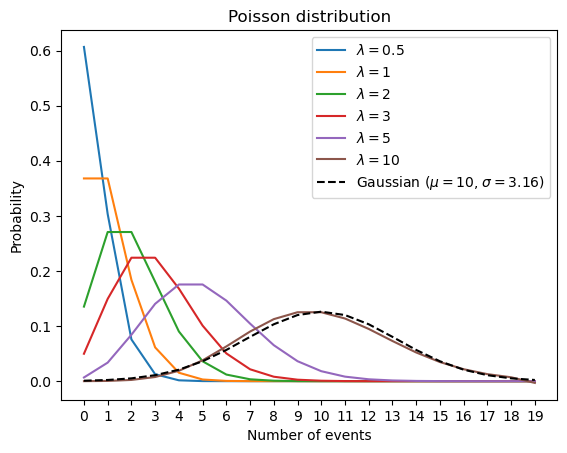

In [2]:
fig, ax = plt.subplots()
mu_values = [0.5, 1, 2, 3, 5, 10]
x = np.arange(0, 20)

for mu in mu_values:
    f = [np.math.factorial(i) for i in x]
    y = np.exp(-mu) * mu ** x / f
    ax.plot(x, y, label=f"$\\lambda={mu}$")

# Plot the gaussian
mu = 10
sigma = np.sqrt(mu)
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

ax.plot(x, y, label=f"Gaussian ($\\mu={mu}$, $\\sigma={sigma:.2f}$)", linestyle="--", color="black")

ax.set_xticks(x)
ax.set_xlabel("Number of events")
ax.set_ylabel("Probability")
ax.set_title("Poisson distribution")
ax.legend()

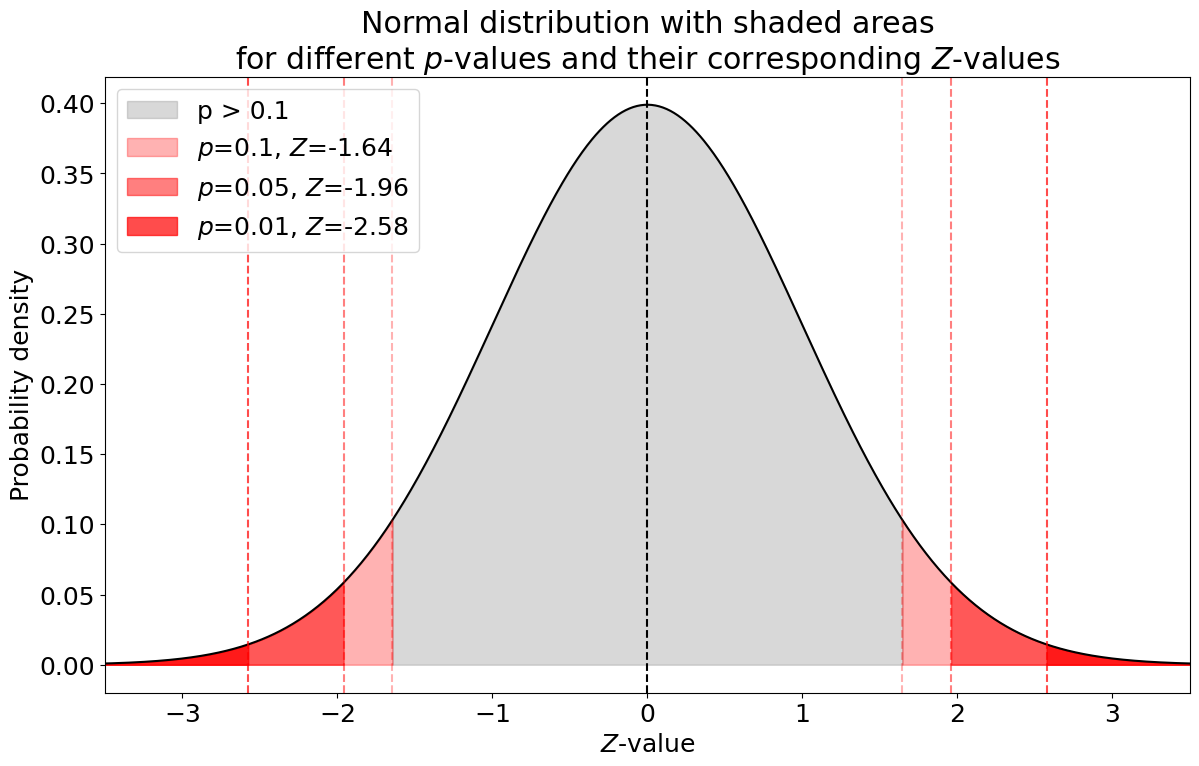

In [64]:
import scipy.stats as stats
import matplotlib

matplotlib.rcParams.update({'font.size': 18})


# Generate data
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

# Plot the normal distribution
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(x, y, color='black')

# Increase the font size

# Shade the area corresponding to different p-values
p_values = [0.1, 0.05, 0.01]
x_min = -5
x_max = 5

# Add a shaded area for p > 0.1
x_left = stats.norm.ppf(max(p_values)/2)
x_right = stats.norm.ppf(1 -max(p_values)/2)
x_fill = np.linspace(x_left, x_right, 100)
y_fill = stats.norm.pdf(x_fill)
ax.fill_between(x_fill, y_fill, color='gray', alpha=0.3, label="p > 0.1")

# Add a line for the mean
ax.axvline(0, color='black', linestyle='--')

for i, p in enumerate(p_values):
    alpha = 0.3 + 0.2 * i

    x_left = stats.norm.ppf(p/2)
    x_right = stats.norm.ppf(1-p/2)

    x_fill = np.linspace(x_min, x_left, 100)
    y_fill = stats.norm.pdf(x_fill)
    ax.fill_between(x_fill, y_fill, color="red", alpha=alpha, label=f"$p$={p}, $Z$={x_left:.2f}")

    x_fill = np.linspace(x_right, x_max, 100)
    y_fill = stats.norm.pdf(x_fill)
    ax.fill_between(x_fill, y_fill, color="red", alpha=alpha)

    # Also plot the vertical lines on the right for Z-values
    ax.axvline(x_left, color="red", alpha=alpha, linestyle='--')
    ax.axvline(x_right, color="red", alpha=alpha, linestyle='--')


# Add legend for the colors
# legend_labels = [f"p={p}" for p in p_values]
# ax.legend(legend_labels)
# Show legend in the top right corner without background
ax.legend(loc='upper left', frameon=True)

ax.set_xlim(x_min + 1.5, x_max - 1.5)
ax.set_xlabel("$Z$-value")
ax.set_ylabel("Probability density")
ax.set_title('Normal distribution with shaded areas\nfor different $p$-values and their corresponding $Z$-values')
plt.savefig("thesis/generated/p_values.svg")
plt.show()


In [70]:
# Get the p values for significances 1,2,3,4,5
S = np.arange(1, 6)
p_values = np.zeros_like(S, dtype=np.float64)
for i, s in enumerate(S):
    p_values[i] = 1 - stats.poisson.cdf(s, mu=1)
print(p_values)


[0.26424112 0.0803014  0.01898816 0.00365985 0.00059418]
